In [1]:
import seaborn as sns
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
def read_performances(path_prefix, run_dirs, filename, num_goals):
    all_performances = []
    
    for run_dir in run_dirs:
        with open(path_prefix + run_dir + filename, "r") as performance_file:
            temp_performances = json.load(performance_file)
            all_performances.extend(temp_performances[num_goals]["success_rate"])
    
    return all_performances

In [3]:
run_dirs = ["run_1/", "run_2/", "run_3/", "run_4/", "run_5/"]
pretrain_filename = "training_records_pretrain.json"
scratch_filename = "training_records_scratch.json"

# Training Performances over the user goal portions

## Training Records for 5 User Goals

In [4]:
path_prefix_5_goals = "../5_goals/50_episodes_1_9/"

training_records_pretrain_5_goals = read_performances(path_prefix_5_goals, run_dirs, pretrain_filename, "5")
training_records_scratch_5_goals = read_performances(path_prefix_5_goals, run_dirs, scratch_filename, "5") 

pprint(len(training_records_pretrain_5_goals))
pprint(len(training_records_scratch_5_goals))

196
196


## Training Records for 10 User Goals

In [5]:
path_prefix_10_goals = "../10_goals/50_episodes_1_9/"

training_records_pretrain_10_goals = read_performances(path_prefix_10_goals, run_dirs, pretrain_filename, "10")
training_records_scratch_10_goals = read_performances(path_prefix_10_goals, run_dirs, scratch_filename, "10") 

pprint(len(training_records_pretrain_10_goals))
pprint(len(training_records_scratch_10_goals))

193
193


## Training Records for 20 User Goals

In [6]:
path_prefix_20_goals = "../20_goals/50_episodes_1_9/"

training_records_pretrain_20_goals = read_performances(path_prefix_20_goals, run_dirs, pretrain_filename, "20")
training_records_scratch_20_goals = read_performances(path_prefix_20_goals, run_dirs, scratch_filename, "20") 

pprint(len(training_records_pretrain_20_goals))
pprint(len(training_records_scratch_20_goals))

191
191


## Training Records for 30 User Goals

In [7]:
path_prefix_30_goals = "../30_goals/50_episodes_1_9/"

training_records_pretrain_30_goals = read_performances(path_prefix_30_goals, run_dirs, pretrain_filename, "30")
training_records_scratch_30_goals = read_performances(path_prefix_30_goals, run_dirs, scratch_filename, "30") 

pprint(len(training_records_pretrain_30_goals))
pprint(len(training_records_scratch_30_goals))

191
191


## Training Records for 50 User Goals

In [8]:
path_prefix_50_goals = "../50_goals/50_episodes_1_9/"

training_records_pretrain_50_goals = read_performances(path_prefix_50_goals, run_dirs, pretrain_filename, "50")
training_records_scratch_50_goals = read_performances(path_prefix_50_goals, run_dirs, scratch_filename, "50") 

pprint(len(training_records_pretrain_50_goals))
pprint(len(training_records_scratch_50_goals))

190
190


## Training Records for 120 User Goals

In [9]:
path_prefix_120_goals = "../120_goals/50_episodes_1_9/"

training_records_pretrain_120_goals = read_performances(path_prefix_120_goals, run_dirs, pretrain_filename, "120")
training_records_scratch_120_goals = read_performances(path_prefix_120_goals, run_dirs, scratch_filename, "120") 

pprint(len(training_records_pretrain_120_goals))
pprint(len(training_records_scratch_120_goals))

189
189


In [10]:
training_records_pretrain = np.array([[0]*189,
                                     training_records_pretrain_5_goals[0:189], 
                                     training_records_pretrain_10_goals[0:189],
                                     training_records_pretrain_20_goals[0:189],
                                     training_records_pretrain_30_goals[0:189],
                                     training_records_pretrain_50_goals[0:189],
                                     training_records_pretrain_120_goals[0:189]])

In [11]:
training_records_scratch = np.array([[0]*189,
                                     training_records_scratch_5_goals[0:189], 
                                     training_records_scratch_10_goals[0:189],
                                     training_records_scratch_20_goals[0:189],
                                     training_records_scratch_30_goals[0:189],
                                     training_records_scratch_50_goals[0:189],
                                     training_records_scratch_120_goals[0:189]])
pprint(training_records_scratch.T)

array([[ 0.  ,  0.47,  0.  , ...,  0.37,  0.26,  0.55],
       [ 0.  ,  0.39,  0.37, ...,  0.36,  0.46,  0.  ],
       [ 0.  ,  0.09,  0.  , ...,  0.35,  0.  ,  0.  ],
       ..., 
       [ 0.  ,  0.48,  0.52, ...,  0.49,  0.  ,  0.38],
       [ 0.  ,  0.49,  0.34, ...,  0.  ,  0.63,  0.38],
       [ 0.  ,  0.  ,  0.09, ...,  0.8 ,  0.  ,  0.37]])


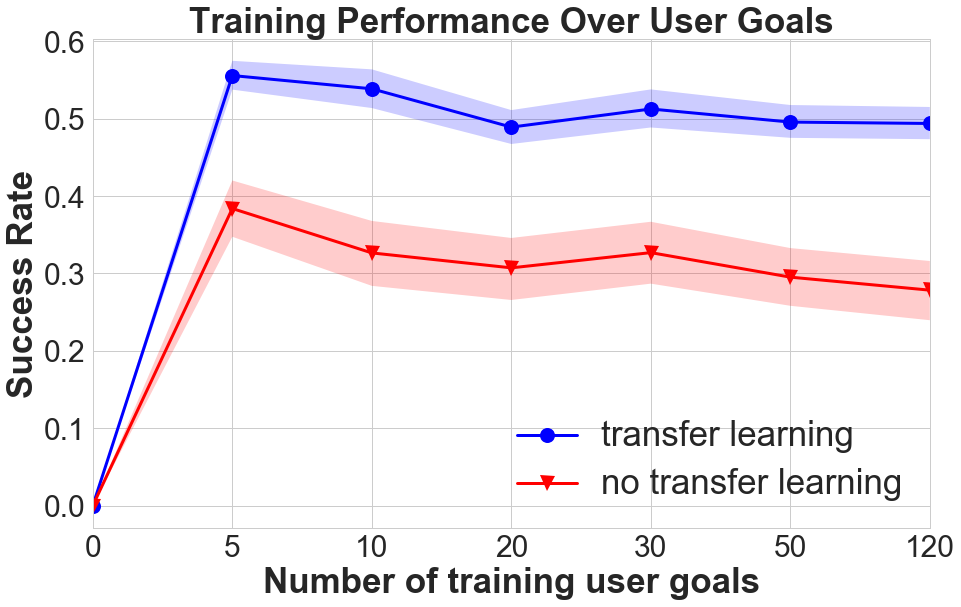

In [12]:
plt.figure(figsize=(15, 9))
sns.set(font_scale=3)
sns.set_style("whitegrid")

data = training_records_pretrain.T
ax = sns.tsplot(data=data,  ci=[95], color='blue', marker='o', markersize=15, linewidth=3.0, condition="transfer learning")


data = training_records_scratch.T
ax = sns.tsplot(data=data,  ci=[95], color='red', marker='v', markersize=15, linewidth=3.0, condition ="no transfer learning")

# sns.plt.legend(labels=["transfer learning", "no transfer learning"])

pts_seq = [0, 5, 10, 20, 30, 50, 120]
ax.set(xticklabels=pts_seq)

ax.set_xlabel('Number of training user goals', weight='bold', size=35)
ax.set_ylabel('Success Rate', weight='bold', size=35)
sns.plt.title('Training Performance Over User Goals', weight='bold', size=35)

plt.setp(ax.get_legend().get_texts(), fontsize="35")
plt.savefig("training_over_user_goal_portions_50_episodes_200_repetitions_95_confidence_color.png", dpi=200, bbox_inches="tight", pad_inches=0)
plt.show()